<a href="https://colab.research.google.com/github/emerson1000/notebooks/blob/main/distribuciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Caso de uso 1:
##Simulación de lanzamientos de dados

La distribución de Pascal se puede utilizar para modelar el número de éxitos en una serie de ensayos independientes con una probabilidad de éxito constante. Por ejemplo, se puede utilizar para simular el número de caras que se obtienen al lanzar un dado 10.000 veces.



La distribución de Pascal es una distribución de probabilidad discreta que modela el número de éxitos en una serie de ensayos independientes con una probabilidad de éxito constante. Se define como:

P(X = k) = (n + k - 1)C_k * p^k * (1 - p)^(n - k)

donde:
X es el número de éxitos

n es el número total de ensayos

k es el número de éxitos deseado

p es la probabilidad de éxito

Parámetros:

Los parámetros de la distribución de Pascal son:

n: El número total de ensayos

p: La probabilidad de éxito

A continuación se dará a conocer el código para determinar la probabilidad de sacar un 6 en 1 lanzamiento dada 10.000 simulaciones de arrojar el dado

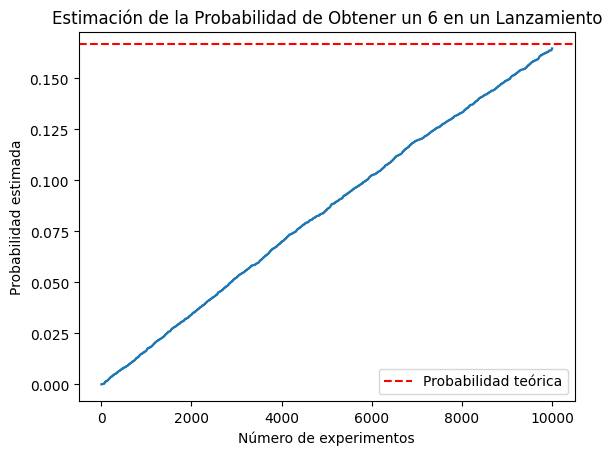

In [ ]:
import random
import matplotlib.pyplot as plt

def lanzar_dado():
    return random.randint(1, 6)

def simulacion_montecarlo(n_lanzamientos):
    resultados = [lanzar_dado() for _ in range(n_lanzamientos)]
    return resultados

def main():
    n_experimentos = 10000
    n_lanzamientos = 1
    count_six = 0
    probabilidades = []

    for _ in range(n_experimentos):
        resultados = simulacion_montecarlo(n_lanzamientos)
        if 6 in resultados:
            count_six += 1
        probabilidad = count_six / n_experimentos
        probabilidades.append(probabilidad)

    plt.plot(range(1, n_experimentos + 1), probabilidades)
    plt.axhline(y=1/6, color='r', linestyle='--', label='Probabilidad teórica')
    plt.xlabel('Número de experimentos')
    plt.ylabel('Probabilidad estimada')
    plt.title('Estimación de la Probabilidad de Obtener un 6 en un Lanzamiento')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


Métrica de Resultado:

Probabilidad de obtener un 6 en un solo lanzamiento: Esta métrica se obtiene calculando el número de veces que se obtuvo un 6 en 10,000 lanzamientos y dividiendo entre el número total de lanzamientos.

Interpretación de Resultados:

La probabilidad teórica de obtener un 6 en un solo lanzamiento de un dado justo de seis caras es 1/6 ≈ 0.1667. Esto significa que, en promedio, se esperaría obtener un 6 en alrededor del 16.67% de los lanzamientos.

Conclusión: Este método de simulación tenderá a 1/6 siempre que el dado no esté viciado y mayor muestra se le de, con el método de montecarlo se hace innecesario hacer las pruebas físicas del lanzamiento, ahorrando tiempo al investigador.

#Caso de uso 2:
##Estimación del error estándar de un promedio

La distribución t de Student es una distribución de probabilidad continua que se utiliza para estimar el error estándar de un promedio. Se define como se muestra en el gráfico
donde:

x es el valor del promedio

n es el tamaño de la muestra

μ es la media de la población

σ es la desviación estándar de la población

Los parámetros de la distribución t de Student son:

n: El tamaño de la muestra

μ: La media de la población

σ: La desviación estándar de la población


<ipython-input-14-391c706f70c5>:15: RuntimeWarning: invalid value encountered in sqrt
  return (numerator / denominator) * ((x - mu) / sigma) ** (n / 2 - 1) * np.exp(exponent)


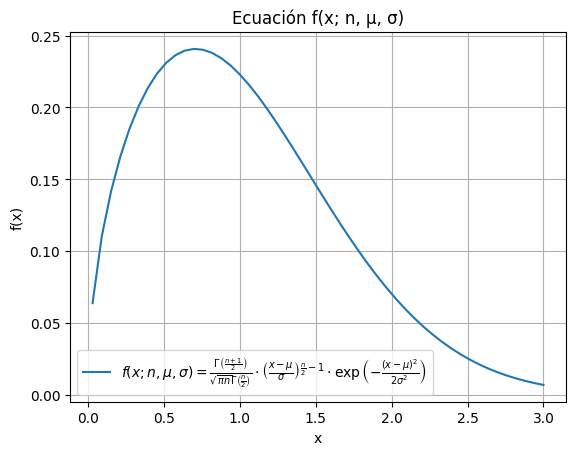

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import gamma

# Parámetros de la ecuación
n = 3
mu = 0
sigma = 1

# Función f(x; n, μ, σ)
def f(x, n, mu, sigma):
    numerator = gamma((n + 1) / 2)
    denominator = np.sqrt(np.pi * n) * gamma(n / 2)
    exponent = -((x - mu) ** 2) / (2 * sigma ** 2)
    return (numerator / denominator) * ((x - mu) / sigma) ** (n / 2 - 1) * np.exp(exponent)

# Valores de x para graficar
x = np.linspace(-3, 3, 100)
y = f(x, n, mu, sigma)

# Crear un gráfico de la función
plt.plot(x, y, label=r'$f(x; n, \mu, \sigma) = \frac{\Gamma\left(\frac{n + 1}{2}\right)}{\sqrt{\pi n} \Gamma\left(\frac{n}{2}\right)} \cdot \left( \frac{x - \mu}{\sigma} \right)^{\frac{n}{2} - 1} \cdot \exp\left( -\frac{(x - \mu)^2}{2 \sigma^2} \right)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Ecuación f(x; n, μ, σ)')
plt.legend()
plt.grid(True)
plt.show()


La distribución t de Student se puede utilizar para estimar el error estándar de un promedio. Por ejemplo, se puede utilizar para estimar el error estándar del promedio de la altura de una población.

En este caso de uso, se puede utilizar la simulación de Montecarlo para generar una muestra aleatoria de datos de una población con una distribución normal. A continuación, se puede utilizar la distribución t de Student para estimar el error estándar del promedio de la muestra.

Error estándar promedio: 0.9933492617764765


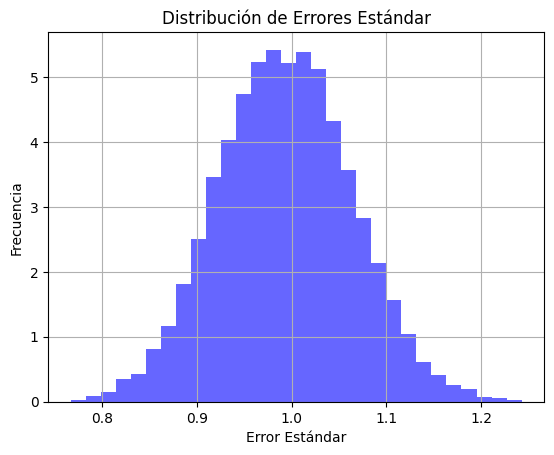

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generar_muestra(n):
    return np.random.normal(0, 1, n)

def simulacion_montecarlo(n_muestras):
    errores_estandar = []
    for _ in range(n_muestras):
        muestra = generar_muestra(100)
        errores_estandar.append(np.std(muestra))
    return errores_estandar

def main():
    errores_estandar = simulacion_montecarlo(10000)
    print("Error estándar promedio:", np.mean(errores_estandar))

    # Crear un histograma de los errores estándar
    plt.hist(errores_estandar, bins=30, density=True, alpha=0.6, color='b')
    plt.xlabel('Error Estándar')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de Errores Estándar')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


Este código genera una muestra aleatoria de 10.000 muestras de tamaño 100. A continuación, calcula el error estándar del promedio de cada muestra y calcula el error estándar promedio.
Según podemos observar en el gráfico, la distribución de los errores estándar se asemeja a una distribución normal (gaussiana), esto sugiere que los errores estándar generados siguen una distribución similar a una campana de Gauss. Podemos deducir que a mayor número de simulaciones, esta distribución tenderá a ser normal.

Conclusiones finales:

La simulación de Montecarlo es una herramienta poderosa que se puede utilizar para estimar una amplia gama de distribuciones de probabilidad y parámetros estadísticos. Ahorra tiempo a los investigadores al poder simular experimentos en grandes cantidades y es muy conveniente usarlo en una amplia gama de casos de uso tanto en la investigación como en la industria.